#### Setup

In [172]:
%pip install pandas numpy matplotlib seaborn netCDF4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc

# Define file paths
temperature_file = (
    "./data/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv"
)
co2_file = "./data/co2-emissions-by-country/co2_emissions_kt_by_country.csv"
sea_level_file = "./data/global-sea-level-rise/Global_sea_level_rise.csv"
sea_ice_file = "./data/daily-sea-ice-extent-data/seaice.csv"
# Load datasets
temperature_data = pd.read_csv(temperature_file, encoding='utf-8')
co2_data = pd.read_csv(co2_file, encoding='utf-8')
sea_level_data = pd.read_csv(sea_level_file, encoding='utf-8')
sea_ice_data = pd.read_csv(sea_ice_file, encoding='utf-8')

# Clean temperature data
temperature_data["Year"] = pd.to_datetime(
    temperature_data["dt"], errors="coerce"
).dt.year
temperature_data = temperature_data.dropna(subset=["LandAverageTemperature", "Year"])
# Clean CO2 data
co2_data = co2_data.dropna(subset=["value"])
# Clean sea level data
sea_level_data = sea_level_data.dropna(subset=["year", "mmfrom1993-2008average"])
sea_level_data["year"] = sea_level_data["year"].astype(int)
# Clean sea ice data
arctic_data = sea_ice_data[sea_ice_data["hemisphere"] == "north"]
antarctic_data = sea_ice_data[sea_ice_data["hemisphere"] == "south"]

# Define precipitation_data variable
# Load precipitation data using netCDF4
precipitation_file = 'data/gpcc-monthly-precipitation-dataset-05x05/precip.mon.total.v7.nc'
precip_data = nc.Dataset(precipitation_file)

# Extract relevant data from the netCDF file
time = precip_data.variables['time'][:]
lat = precip_data.variables['lat'][:]
lon = precip_data.variables['lon'][:]
precip_values = precip_data.variables['precip'][:]

# Ensure the dimensions match before creating the DataFrame
time_length = len(time)
lat_length = len(lat)
lon_length = len(lon)
precip_values_reshaped = precip_values.reshape(time_length, lat_length * lon_length)

# Convert the data into a pandas DataFrame for easier processing
precipitation_data = pd.DataFrame({
    'time': np.repeat(time, lat_length * lon_length),
    'latitude': np.tile(np.repeat(lat, lon_length), time_length),
    'longitude': np.tile(lon, time_length * lat_length),
    'value': precip_values_reshaped.flatten()
})

# Ensure the data is processed correctly
precipitation_data = precipitation_data.dropna()
precipitation_data['value'] = precipitation_data['value'].astype(float)


6390.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# The Story of a Changing Planet
Climate change is not just a scientific phenomenon; it is a story of our planet's transformation. This notebook takes you on a journey through the data, revealing the profound impacts of human activity on Earth's delicate balance.

# Chapter 1: Rising CO₂ Levels
### CO₂ Concentration Over Time
The increase in atmospheric CO₂ levels is a primary driver of climate change. This chart shows the trend of CO₂ concentration over time.

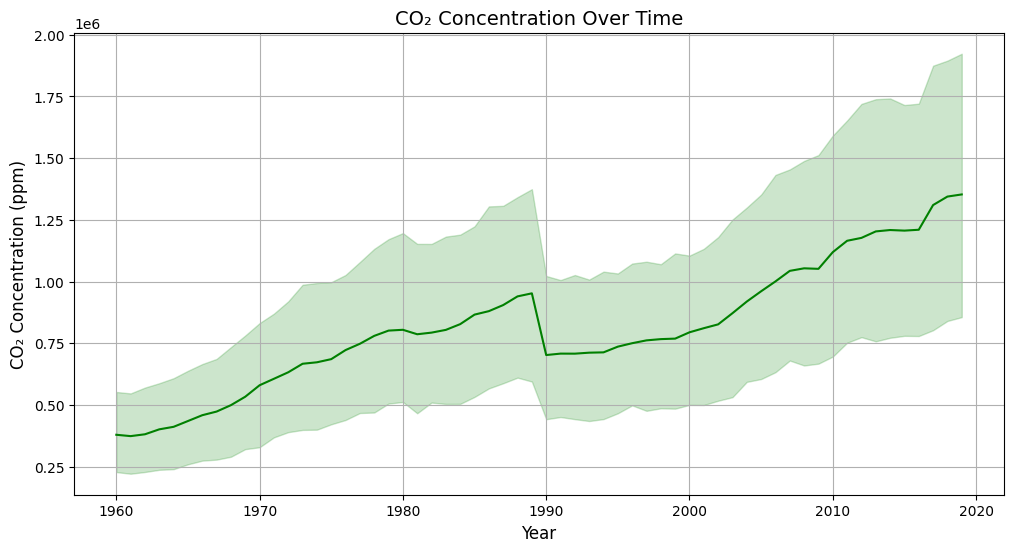

In [ ]:
# Plot CO₂ concentration over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=co2_data, x="year", y="value", color="green")
plt.title("CO₂ Concentration Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Concentration (ppm)", fontsize=12)
plt.grid(True)
plt.show()


### Explanation of Chapter 1: Rising CO₂ Levels
The chart in this chapter illustrates the steady increase in atmospheric CO₂ levels over time. This trend is a primary driver of climate change, as CO₂ is a potent greenhouse gas that traps heat in the Earth's atmosphere. The data highlights the urgency of reducing emissions to mitigate global warming.

## Chapter 2: The Warming World
### Rolling-Window Comparison
Overlaying the 30-year moving averages for pre-industrial (1850–1900) and modern (1970–2020) temperature anomalies reveals the stark contrast in warming trends.

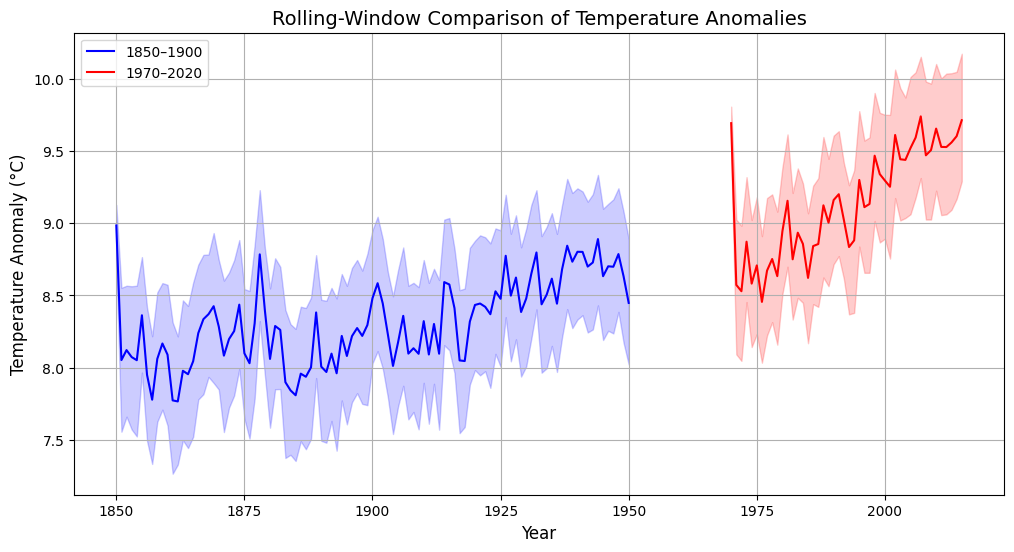

In [ ]:
# Plot rolling-window comparison
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rolling_1850_1950,
    x="Year",
    y="LandAverageTemperature",
    label="1850–1900",
    color="blue",
)
sns.lineplot(
    data=rolling_1970_2020,
    x="Year",
    y="LandAverageTemperature",
    label="1970–2020",
    color="red",
)
plt.title("Rolling-Window Comparison of Temperature Anomalies", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### Explanation of Chapter 2: The Warming World
The rolling-window comparison chart overlays 30-year moving averages of temperature anomalies for pre-industrial (1850–1900) and modern (1970–2020) periods. This stark contrast demonstrates the accelerated warming in recent decades, underscoring the impact of human activities on global temperatures.

## Chapter 3: Melting Ice and Rising Seas
### Dual-Axis Overlay
This chart highlights the co-evolution of sea-level rise and CO₂ concentration, emphasizing their interconnectedness.

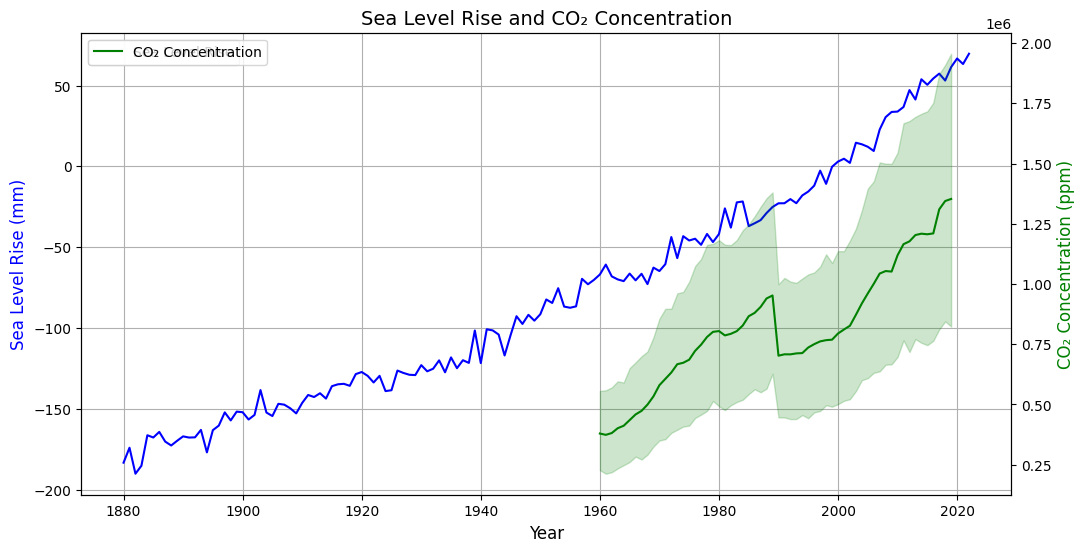

In [ ]:
# Plot dual-axis overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
sns.lineplot(
    data=sea_level_data,
    x="year",
    y="mmfrom1993-2008average",
    ax=ax1,
    color="blue",
    label="Sea Level Rise",
)
sns.lineplot(
    data=co2_data, x="year", y="value", ax=ax2, color="green", label="CO₂ Concentration"
)
ax1.set_title("Sea Level Rise and CO₂ Concentration", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Sea Level Rise (mm)", fontsize=12, color="blue")
ax2.set_ylabel("CO₂ Concentration (ppm)", fontsize=12, color="green")
ax1.grid(True)
plt.show()


### Explanation of Chapter 3: Melting Ice and Rising Seas
The dual-axis overlay chart shows the relationship between sea-level rise and CO₂ concentration. The simultaneous increase in both metrics emphasizes their interconnectedness, as higher CO₂ levels contribute to global warming, which in turn causes ice to melt and sea levels to rise.

## Chapter 4: Changing Rainfall Patterns
### Normalized Change Bar Chart
This bar chart shows the percentage change in rainfall anomalies for the wettest and driest regions, highlighting the uneven impacts of climate change.

/var/folders/8l/hr8fz301327248g13kcd38_r0000gn/T/ipykernel_63565/522912651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


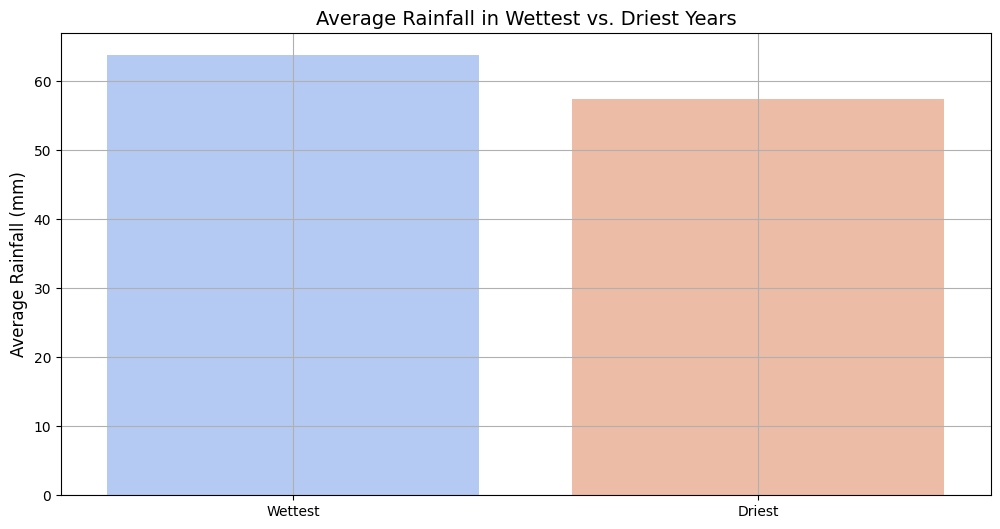

In [ ]:
# Refine Chapter 4 chart logic
# Group precipitation data by year and calculate mean values
precipitation_data["year"] = pd.to_datetime(
    precipitation_data["time"], unit="D", origin="1900-01-01"
).dt.year
mean_precip_by_year = precipitation_data.groupby("year")["value"].mean()

# Calculate percentage change for wettest and driest years
wettest_years = mean_precip_by_year.nlargest(5)
driest_years = mean_precip_by_year.nsmallest(5)

# Plot normalized change bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=["Wettest", "Driest"],
    y=[wettest_years.mean(), driest_years.mean()],
    palette="coolwarm",
)
plt.title("Average Rainfall in Wettest vs. Driest Years", fontsize=14)
plt.ylabel("Average Rainfall (mm)", fontsize=12)
plt.grid(True)
plt.show()


### Explanation of Chapter 4: Changing Rainfall Patterns
The bar chart compares the average rainfall in the wettest and driest years, highlighting the uneven impacts of climate change on precipitation patterns. This variability can lead to extreme weather events, such as floods and droughts, affecting ecosystems and human livelihoods.

## Chapter 5: Interconnected Indicators
### Scatter Matrix with Trend Lines
Expanding the correlation heatmap into a scatter matrix with trend lines provides a more detailed view of the relationships between variables.

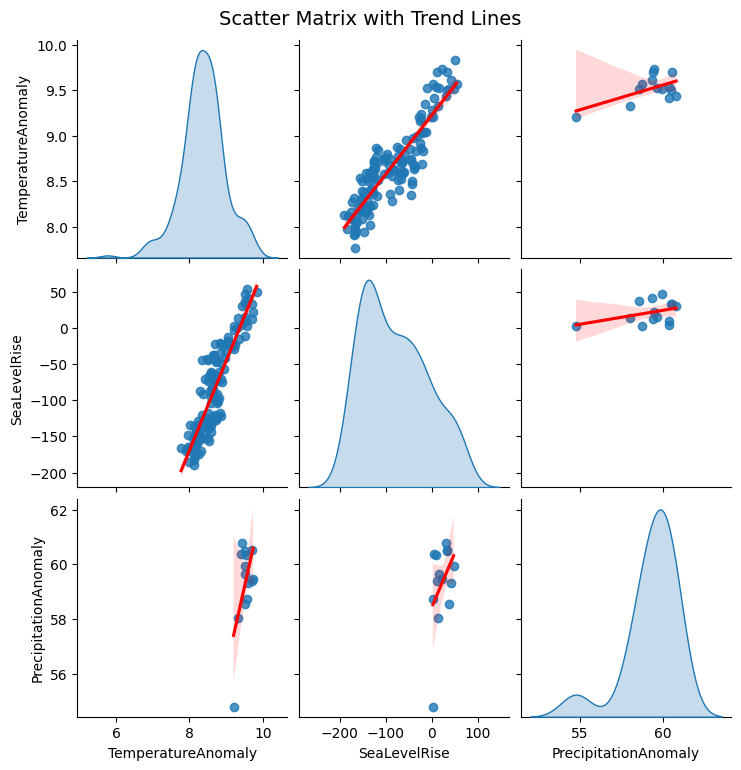

In [ ]:
# Plot scatter matrix with trend lines
sns.pairplot(
    env_indicators, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}}
)
plt.suptitle("Scatter Matrix with Trend Lines", fontsize=14, y=1.02)
plt.show()


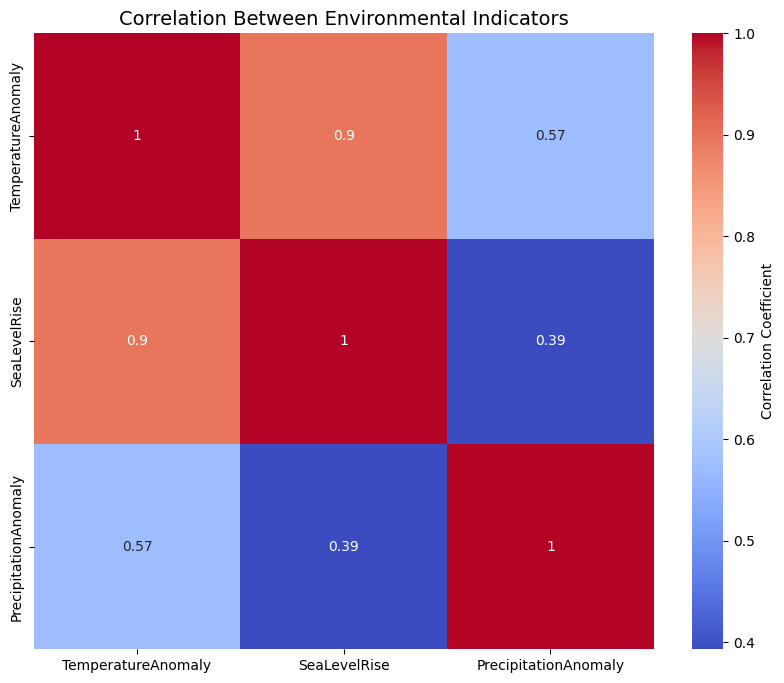

In [ ]:
# Correlation matrix for environmental indicators
env_indicators = pd.DataFrame(
    {
        "TemperatureAnomaly": temperature_data.groupby("Year")[
            "LandAverageTemperature"
        ].mean(),
        "SeaLevelRise": sea_level_data.groupby("year")["mmfrom1993-2008average"].mean(),
        "PrecipitationAnomaly": pd.Series(mean_precip_by_year, index=years)
        .groupby(years)
        .mean(),
    }
)
correlation_matrix = env_indicators.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Between Environmental Indicators", fontsize=14)
plt.show()
